# Radar chart & parallel coordinates plot

In [2]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [2]:
sinatra_df = pd.read_csv("data/spotify/frank_sinatra_tracks.csv")
eminem_df = pd.read_csv("data/spotify/eminem_tracks.csv")
mj_df = pd.read_csv("data/spotify/michael_jackson_tracks.csv")
rihanna_df = pd.read_csv("data/spotify/rihanna_tracks.csv")
beatles_df = pd.read_csv("data/spotify/the_beatles_tracks.csv")

In [3]:
audio_features = ['danceability', 'energy', 'loudness', \
                          'acousticness',\
                         'liveness', 'valence', 'tempo']

analysis_sinatra_df = sinatra_df[audio_features]
analysis_eminem_df = eminem_df[audio_features]
analysis_mj_df = mj_df[audio_features]
analysis_rihanna_df = rihanna_df[audio_features]
analysis_beatles_df = beatles_df[audio_features]

In [9]:
def std_data(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    std_df = pd.DataFrame(x_scaled)
    std_df.columns = df.columns
    return std_df

In [5]:
mean_sinatra_df = std_data(analysis_sinatra_df).mean().to_frame().T
mean_eminem_df = std_data(analysis_eminem_df).mean().to_frame().T
mean_mj_df = std_data(analysis_mj_df).mean().to_frame().T
mean_rihanna_df = std_data(analysis_rihanna_df).mean().to_frame().T
mean_beatles_df = std_data(analysis_beatles_df).mean().to_frame().T

In [6]:
def radar_chart(sinatra = False , eminem = False, mj = False, rihanna = False, beatles = False):
    fig = go.Figure()
    if sinatra :
        fig.add_trace(go.Scatterpolar(
              r=mean_sinatra_df.values[0],
              theta=audio_features,
              name='Sinatra'))
    if eminem : 
        fig.add_trace(go.Scatterpolar(
              r=mean_eminem_df.values[0],
              theta=audio_features,
              name='Eminem'))
    if mj :
        fig.add_trace(go.Scatterpolar(
              r=mean_mj_df.values[0],
              theta=audio_features,
              name='MJ'))
    if rihanna :
        fig.add_trace(go.Scatterpolar(
              r=mean_rihanna_df.values[0],
              theta=audio_features,
              name='Rihanna'))
    if beatles :
        fig.add_trace(go.Scatterpolar(
              r=mean_beatles_df.values[0],
              theta=audio_features,
              name='The Beatles'))
    
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1])),
      showlegend=True)
    fig.show()

In [7]:
radar_chart(sinatra = True , eminem = True, mj = True, rihanna = True, beatles = True)

In [21]:
std_sinatra_df = std_data(analysis_sinatra_df)
std_eminem_df = std_data(analysis_eminem_df)
std_mj_df = std_data(analysis_mj_df)
std_rihanna_df = std_data(analysis_rihanna_df)
std_beatles_df = std_data(analysis_beatles_df)

std_sinatra_df['artist'] = "Frank Sinatra"
std_eminem_df['artist'] = "Eminem"
std_mj_df['artist'] = "Michael Jackson"
std_rihanna_df['artist'] = "Rihanna"
std_beatles_df['artist'] = "The Beatles"

all_artist_df = pd.concat([  std_eminem_df, std_mj_df ])

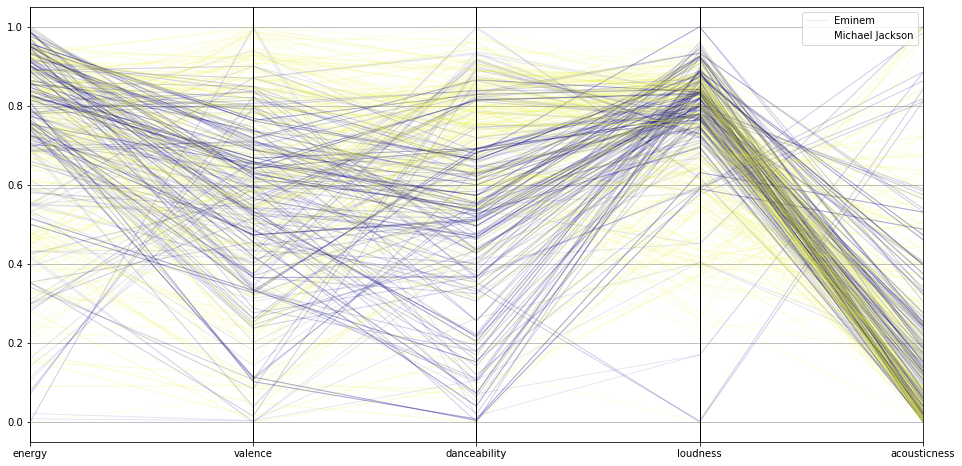

In [22]:
columns = ['energy', 'valence', 'danceability', 'loudness','acousticness']

plt.figure(figsize=(16,8))
cmap = plt.cm.get_cmap('plasma')
colors = [cmap(x) for x in np.linspace(0, 1, 2)]
pd.plotting.parallel_coordinates(all_artist_df , class_column = 'artist' , cols = columns, alpha = 0.1, linewidth = 1, color = colors)
plt.show()

In [195]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = all_artist_df['artist'],
                   colorscale = [[0,'#d8e2dc'],[0.25,'#ffe5d9'],[0.5,'#ffcad4'],[0.75,'#f4acb7'],[1,'#9d8189']]),
        dimensions = list([
            dict(range = [0,1],
                label = 'Danceability', values = all_artist_df['danceability']),
            dict(range = [0,1],
                label = 'Energy', values = all_artist_df['energy']),
            dict(range = [0,1],
                label = 'Loundness', values = all_artist_df['loudness']),
            dict(range = [0,1],
                label = 'acousticness', values = all_artist_df['acousticness'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [3]:
full_df = pd.read_csv("../data/spot_lyr_df.csv")

In [4]:
full_df

name_track  duration_ms  \
0                            Nice 'N' Easy - Remastered       165786   
1                                         Ol' Macdonald       160306   
2                                      Sentimental Baby       156280   
3                             Love Looks So Well On You       158893   
4                                            Sleep Warm       166066   
5             What Are You Doing The Rest Of Your Life?       243400   
6                                      The Summer Knows       162133   
7                                  Summer Me, Winter Me       246226   
8                                       L.A. Is My Lady       195160   
9                    How Do You Keep The Music Playing?       235200   
10                                   Christmas Memories       130253   
11                                   Leave It All To Me       200746   
12                How Do You Keep The Music Playing '83       244933   
13          You Make Me Feel so Young - 2007 - Remaster       174960   
14            It Happened in Monterey - 2007 - Remaster       153986   
15                 My Funny Valentine - 2007 - Remaster       151706   
16            Too Marvelous for Words - 2007 - Remaster       144813   
17         I've Got You Under My Skin - 2007 - Remaster       220986   
18                        Mood Indigo - 2007 - Remaster       209493   
19     What Is This Thing Called Love - 2007 - Remaster       154680   
20            I Get a Kick Out of You - 2007 - Remaster       175853   
21            Taking a Chance On Love - 2007 - Remaster       135226   
22                        A Foggy Day - 2007 - Remaster       159826   
23    They Can't Take That Away from Me - 2007 - Rem...       119026   
24           Just One of Those Things - 2007 - Remaster       195693   
25    In the Wee Small Hours of the Morning - 2007 -...       178933   
26                          All of Me - 2007 - Remaster       130026   
27                     Old Devil Moon - 2007 - Remaster       236040   
28                    One for My Baby - 2007 - Remaster       219146   
29               Love Is Here to Stay - 2007 - Remaster       160080   
...                                                 ...          ...   
1682                                   We All Want Love       237013   
1683                                      Drunk On Love       212186   
1684                                         Roc Me Out       209266   
1685                                     Watch n' Learn       211000   
1686                                           Farewell       256306   
1687                You Da One - Album Version (Edited)       200013   
1688                                Where Have You Been       242680   
1689                                      We Found Love       215226   
1690            Talk That Talk - Album Version (Edited)       209600   
1691                                Cockiness (Love It)       178026   
1692             Birthday Cake - Album Version (Edited)        78200   
1693                                   We All Want Love       237013   
1694                                      Drunk On Love       212186   
1695                                         Roc Me Out       209266   
1696                                     Watch n' Learn       211000   
1697                                           Farewell       256320   
1698                                         You Da One       200013   
1699                                Where Have You Been       242680   
1700                                      We Found Love       215226   
1701                                     Talk That Talk       209600   
1702                                Cockiness (Love It)       178026   
1703                                      Birthday Cake        78200   
1704                                   We All Want Love       237013   
1705                                      Drunk On Love       212186   
1706         

In [10]:
audio_features = ['danceability', 'energy', 'loudness', \
                          'acousticness',\
                          'valence', 'tempo']

spotify_df = full_df[audio_features + ['artist']]

In [11]:
def build_df(spotify_df, audio_features, artist):
    df = spotify_df.loc[spotify_df['artist'] == artist]
    analysis_df = df[audio_features]
    mean_df = std_data(analysis_df).mean().to_frame().T
    mean_df = mean_df.T.reset_index()
    mean_df.columns = ['audio features' , 'values']
    return mean_df

In [12]:
sinatra_df = build_df(spotify_df, audio_features, 'Frank Sinatra')
rihanna_df = build_df(spotify_df, audio_features, 'Rihanna')
eminem_df = build_df(spotify_df, audio_features, 'Eminem')
beatles_df = build_df(spotify_df, audio_features, 'The Beatles')
mj_df = build_df(spotify_df, audio_features, 'Michael Jackson')

In [13]:
def bar_chart_audio_features(df):
    ordered_df = df.sort_values(by='values')
    my_range=range(1,len(df.index)+1)

    # The vertival plot is made using the hline function
    # I load the seaborn library only to benefit the nice looking feature
    import seaborn as sns
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
    plt.plot(ordered_df['values'], my_range, "o")

    # Add titles and axis names
    plt.yticks(my_range, ordered_df['audio features'])
    plt.title("Audio Signature")
    plt.xlim(0,0.8)




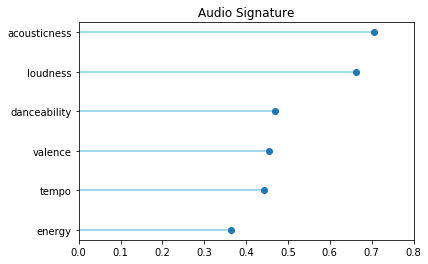

In [14]:
bar_chart_audio_features(sinatra_df)

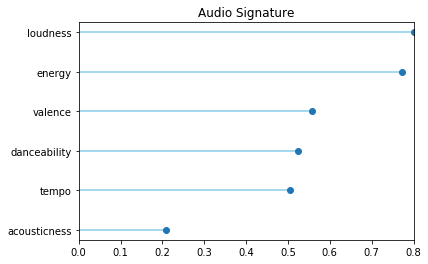

In [15]:
bar_chart_audio_features(eminem_df)

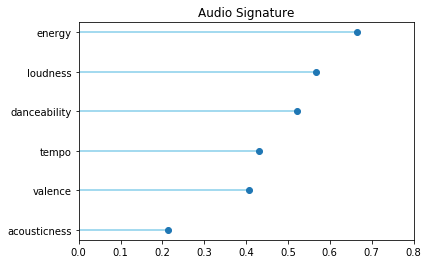

In [16]:
bar_chart_audio_features(rihanna_df)

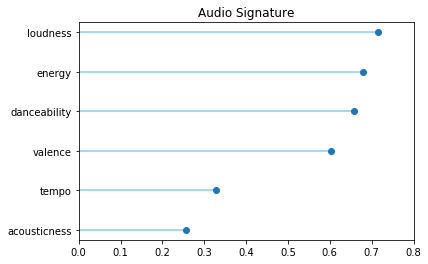

In [17]:
bar_chart_audio_features(mj_df)

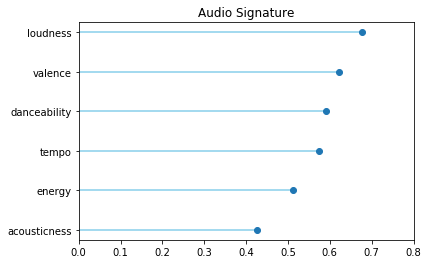

In [18]:
bar_chart_audio_features(beatles_df)

In [19]:
sinatra_df.column

AttributeError: 'DataFrame' object has no attribute 'column'

In [20]:
sinatra_df.columns = ['audio features' , 'Frank Sinatra']
eminem_df.columns = ['audio features' , 'Eminem']
mj_df.columns = ['audio features' , 'Michael Jackson']
rihanna_df.columns = ['audio features' , 'Rihanna']
beatles_df.columns = ['audio features' , 'The Beatles']

In [21]:
widget_df = pd.concat([sinatra_df, eminem_df['Eminem'], mj_df['Michael Jackson'], rihanna_df['Rihanna'], beatles_df['The Beatles']], axis = 1)

In [22]:
widget_df

audio features  Frank Sinatra    Eminem  Michael Jackson   Rihanna  \
0   danceability       0.470160  0.522827         0.657595  0.520458   
1         energy       0.362781  0.772281         0.678782  0.665787   
2       loudness       0.663008  0.801800         0.716107  0.567968   
3   acousticness       0.706268  0.208625         0.256865  0.214058   
4        valence       0.455729  0.558294         0.602854  0.406664   
5          tempo       0.441588  0.504237         0.326963  0.431689   

   The Beatles  
0     0.590397  
1     0.511304  
2     0.676170  
3     0.425952  
4     0.620870  
5     0.573830

In [24]:
widget_df.to_csv("../widget1/data.csv", index = False)